In [29]:
from control import *
import numpy as np
import matplotlib.pyplot as plt

In [30]:
kp = 31.28054740957967
ki = 44.965786901270775
kd = 947.2140762463343

In [31]:
plant = tf([1], [64,9.6,0.48,0.008])
pid = tf([kd,kp,ki], [1,0])

In [32]:
sys1 = feedback(pid*plant, 1)

In [33]:
sys1d = sys1.sample(Ts=0.025, method='zoh', alpha=None)
sys1d


0.004617 z^3 - 0.004618 z^2 - 0.004608 z + 0.004609
---------------------------------------------------
    z^4 - 3.987 z^3 + 5.97 z^2 - 3.98 z + 0.9963

dt = 0.025

In [34]:
time = np.arange(0,100)

<function matplotlib.pyplot.show>

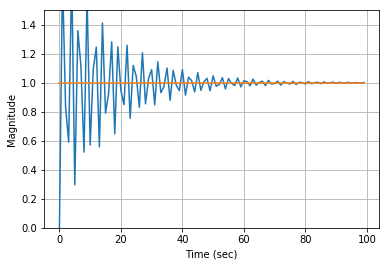

In [43]:
# PID compensated Step Response
t, z = step_response(sys1,T=time) # chage to sys1d to probe discrete domain
target = np.linspace(1, 1, num=len(t))
plt.figure()
# In continuos domain:
plt.plot(t,z,t,target)
# In discrete domain:
#plt.plot(z[0])
plt.ylim([0,1.5])
plt.ylabel(r'Magnitude')
plt.xlabel(r'Time (sec)')
plt.grid()
plt.show

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
C = [0, 4, 0, 0]
A = np.fft.fft(C)
B = np.fft.ifft(A)
A - B
B.real - C

array([0., 0., 0., 0.])

In [56]:
x = pd.read_excel('antihorario.xlsx')

In [57]:
t = np.array((x['time']))

In [58]:
posW = np.array((x['antihorapos']))
pwmW = np.array((x['pwm']))

In [59]:
posSp = np.fft.fft(posW)
IposSp = np.fft.ifft(posSp)
posW - IposSp.real
posW

array([   1.1 ,    1.1 ,    1.1 , ..., -511.14, -511.14, -513.23])

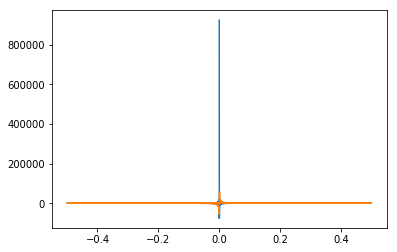

In [60]:
posSp = np.fft.fft(posW)
pwmSp = np.fft.fft(pwmW)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, pwmSp.real, freq, pwmSp.imag)
plt.show()

In [61]:
x['pwm'] = pwmSp.real
x['antihorapos'] = posSp.real
x['pwmIm'] = pwmSp.imag
x['antihoraposIm'] = posSp.imag

In [62]:
#x = pd.read_excel('antihorario.xlsx')

#d = {'time': np.arange(10), 'pwm': np.arange(10), 'antihorapos': np.arange(10)}
#x = pd.DataFrame(data=d)

q1 = pd.DataFrame()
q1['pwm1'] = pd.Series(x['pwm'], index=x.index)
q1['y1'] = pd.Series(x['antihorapos'], index=x.index)
q1['pwm1Im'] = pd.Series(x['pwmIm'], index=x.index)
q1['y1Im'] = pd.Series(x['antihoraposIm'], index=x.index)
q1 = q1.shift(periods=-1, freq=None, axis=0)
#q1 = q1.drop(q1.index[0])

x['pwm1'] = pd.Series(q1['pwm1'], index=x.index)
x['y1'] = pd.Series(q1['y1'], index=x.index)
x['pwm1Im'] = pd.Series(q1['pwm1Im'], index=x.index)
x['y1Im'] = pd.Series(q1['y1Im'], index=x.index)

q2 = pd.DataFrame()
q2['pwm2'] = pd.Series(x['pwm'], index=x.index)
q2['y2'] = pd.Series(x['antihorapos'], index=x.index)
q2['pwm2Im'] = pd.Series(x['pwmIm'], index=x.index)
q2['y2Im'] = pd.Series(x['antihoraposIm'], index=x.index)
q2 = q2.shift(periods=-2, freq=None, axis=0)
#q2 = q2.drop(q2.index[0:2])

x['pwm2'] = pd.Series(q2['pwm2'], index=x.index)
x['y2'] = pd.Series(q2['y2'], index=x.index)
x['pwm2Im'] = pd.Series(q2['pwm2Im'], index=x.index)
x['y2Im'] = pd.Series(q2['y2Im'], index=x.index)

x = x.drop(x.index[4998:5000])

#y = x['antihorapos']
y = pd.DataFrame()
y['antihorapos'] = x['antihorapos']
y['antihoraposIm'] = x['antihoraposIm']

x = x.drop('antihorapos', axis=1)
x = x.drop('antihoraposIm', axis=1)
x = x.drop('time', axis=1)

In [63]:
x

,pwm,pwmIm,pwm1,y1,pwm1Im,y1Im,pwm2,y2,pwm2Im,y2Im
0,922600.000000,0.000000,-74396.535967,-35238.696856,18405.769443,-477428.460374,-65804.373733,-32892.389691,34682.969161,-218959.643816
1,-74396.535967,18405.769443,-65804.373733,-32892.389691,34682.969161,-218959.643816,-52808.976122,-15586.922932,47031.244937,-130998.062661
2,-65804.373733,34682.969161,-52808.976122,-15586.922932,47031.244937,-130998.062661,-37167.827193,-4452.133298,54249.738226,-98659.804082
3,-52808.976122,47031.244937,-37167.827193,-4452.133298,54249.738226,-98659.804082,-20924.279823,-1780.210548,55905.030605,-83793.666835
4,-37167.827193,54249.738226,-20924.279823,-1780.210548,55905.030605,-83793.666835,-6081.460391,-1780.273306,52368.391461,-68877.523697
5,-20924.279823,55905.030605,-6081.460391,-1780.273306,52368.391461,-68877.523697,5706.406218,-2223.110706,44718.853179,-58047.959281
6,-6081.460391,52368.391461,5706.406218,-2223.110706,44718.853179,-58047.959281,13372.209247,-928.897417,34532.806312,-49905.608198
7,5706.406218,44718.853179,13372.209247,-928.897417,34532.806312,-49905.608198,16564.699110,-401.087518,23600.689889,-45443.235073
8,13372.209247,34532.806312,16564.699110,-401.087518,23600.689889,-45443.235073,15649.696713,-140.703677,13623.266998,-41276.315470
9,16564.699110,23600.689889,15649.696713,-140.703677,13623.266998,-41276.315470,11589.410291,-325.798220,5941.835909,-37120.404069


In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [65]:
from sklearn.linear_model import Lasso
model = Lasso()

In [66]:
model.fit(x_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [67]:
model.score(x_test,y_test)

0.9531123973933856

In [68]:
x_test

,pwm,pwmIm,pwm1,y1,pwm1Im,y1Im,pwm2,y2,pwm2Im,y2Im
3865,52.221486,-129.512961,28.218715,272.226978,-199.172062,308.718214,-25.496767,211.592414,-249.624226,284.590661
3549,-207.772275,-11.237996,-164.422981,231.836107,31.365361,179.878760,-106.123513,267.531005,48.802387,194.113511
292,138.352593,1032.505321,339.713089,225.431640,861.177511,-1248.879193,438.358378,198.581378,616.283291,-1315.745016
1454,-177.917969,176.581531,-122.487129,261.927160,201.297612,-198.357884,-61.911329,229.845252,197.269678,-205.379396
1111,6.291511,5.574878,-59.070170,253.799728,-30.944178,-327.542588,-133.793888,284.186566,-32.744106,-295.491698
713,-252.564155,34.812568,-315.524254,252.398592,125.843114,-507.742250,-328.535773,280.330973,235.555607,-544.598536
3561,-226.655137,-66.467585,-206.359023,265.748007,-8.822194,208.189223,-161.430444,260.995603,32.690849,184.088676
1792,-85.011162,157.434954,-35.524387,251.440120,137.640061,-117.526570,-0.975548,254.745790,97.036314,-132.255941
4768,178.962945,-51.749757,442.839454,221.202668,-255.920866,1732.512364,582.896924,265.757644,-561.326271,1796.142811
1998,-135.382737,131.690743,-85.050912,249.247384,136.661270,-90.249973,-38.196601,244.115476,117.557050,-67.728599


In [69]:
predicted = model.predict(x_test)
predicted

array([[  329.30225488,   443.11490698],
       [  209.70896378,    42.88937622],
       [  266.45340707, -1327.17527384],
       ...,
       [  296.2088182 ,   187.9351137 ],
       [  292.49170826,   406.88885601],
       [  290.51895816,   119.96256913]])

In [70]:
predicted.shape

(2000, 2)

In [71]:
y_test

,antihorapos,antihoraposIm
3865,226.487330,293.546306
3549,270.506632,214.957267
292,338.851596,-1432.244871
1454,264.122287,-199.212129
1111,240.999797,-282.060922
713,252.408277,-565.527663
3561,251.298813,178.734084
1792,256.481386,-134.120166
4768,265.994505,1761.287128
1998,281.201723,-63.012262


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted, y_test['antihorapos']])

In [ ]:
residuals = y_test - predicted

In [ ]:
plt.scatter(y_test,residuals)

In [ ]:
ap_residuals = np.abs(residuals) / y_test

In [ ]:
plt.scatter(y_test,ap_residuals)

In [ ]:
lap_residuals = np.log(ap_residuals)

In [ ]:
plt.scatter(y_test,lap_residuals)

In [ ]:
plt.hist(ap_residuals, bins=100, normed=1, histtype='step', cumulative=True);

In [4]:
np.fft.fft([0])

array([0.+0.j])

In [ ]:
def pidController(kp, ki, kd, dt, n, pid1, error0, error1, error2):
    q1 = kp + 0.5*dt*ki + (kd/dt)
    q2 = dt*ki*0.5 - kp - (2*kd/dt)
    q3 = kd/dt

    pid0 = pid1 + q1 * error0 + q2 * error1 + q3 * error2

    pid1 = pid0
    error1 = error0
    error2 = error1
    
    if (pid0 > 255):
        pid0 = 255
    elif (pid0 < 255):
        pid0 = -255
    else:
        pid0 = pid0
    
    d = {'pwm': [pid0], 'time': [dt * n]}
    
    
    return [d, pid0, pid1, error1, error2]

In [43]:
complex(1,2)

(1+2j)

In [ ]:
def evaluatePID(kp, ki, kd, Ts, setPoint):
    #error = 0
    
    pid1 = 0
    pid2 = 0
    error0 = 0
    error1 = 0
    error2 = 0
    y1 = 0
    y2 = 0
    
    E = [0]

    for k in np.arange(10):
    #while error < 900000
        #d, pid0, pid1, error1, error2  = pidController(kp, ki, kd, 0.025, k, pid1, error0, error1, error2)
        
        #q1 = kp + 0.5*0.025*ki + (kd/0.025)
        #q2 = 0.025*ki*0.5 - kp - (2*kd/0.025)
        #q3 = kd/0.025
        
        pidReal = kp
        pidImag = ()

        pid0 = pid1 + q1 * error0 + q2 * error1 + q3 * error2

        pid2 = pid1
        pid1 = pid0
        error1 = error0
        error2 = error1
        
        #if (pid0 > 255):
        #    pid0 = 255
        #elif (pid0 < -255):
        #    pid0 = -255
        #else:
        #    pid0 = pid0
        
        d = {'pwm': [pid0], 'pwm1': [pid1], 'y1': [y1], 'pwm2': [pid2], 'y2': [y2], 'pwm': [pid0], 'pwm1': [pid1], 'y1': [y1], 'pwm2': [pid2], 'y2': [y2]}
        r = pd.DataFrame(data=d)
        #print(r)
        y = model.predict(pd.DataFrame(data=d))
        y1 = y
        y2 = y1
        
        error0 = setPoint - y
        E.append(y)

        print([pid0])
        #print([d, y, pid0, pid1, error1, error2])
    
    return E

In [ ]:
kp = 31.28054740957967
ki = 44.965786901270775
kd = 947.2140762463343
P = evaluatePID(kp, ki, kd, 1)

In [ ]:
#evaluatePID(kp, ki, kd, 1)

In [ ]:
plt.figure()
plt.plot(P)
#plt.ylim([0,1.5])
plt.ylabel(r'Magnitude')
plt.xlabel(r'Time (sec)')
plt.grid()
plt.show

In [ ]:
t = np.arange(256)
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()